In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/home/rayan/Downloads/archive (1)/train.csv")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d/%m/%Y')

In [5]:
data.shape

(9800, 18)

In [6]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [7]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [8]:
data['Postal Code']=data['Postal Code'].fillna(data['Postal Code'].mode()[0])

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data['Category'].value_counts()

Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64

In [11]:
data['City'].value_counts()

City
New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
Goldsboro          1
Montebello         1
Abilene            1
Normal             1
Springdale         1
Name: count, Length: 529, dtype: int64

In [12]:
data['State'].value_counts()

State
California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
Oregon                   122
New Jersey               122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 41
Nevada  

In [13]:
data['Product Name'].value_counts()

Product Name
Staple envelope                                               47
Staples                                                       46
Easy-staple paper                                             44
Avery Non-Stick Binders                                       20
Staples in misc. colors                                       18
                                                              ..
Avery 484                                                      1
Stride Job 150 Highlighters, Chisel Tip, Assorted Colors       1
Brother MFC-9340CDW LED All-In-One Printer, Copier Scanner     1
Grip Seal Envelopes                                            1
Penpower WorldCard Pro Card Scanner                            1
Name: count, Length: 1849, dtype: int64

In [14]:
data['Sub-Category'].value_counts()

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64

In [15]:
data['Ship Mode'].value_counts()

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64

In [16]:
negative_sales = data['Sales'][data['Sales'] < 0].sum() 
print("Is the total sales negative?", negative_sales)

Is the total sales negative? 0.0


In [17]:
data.to_csv('/home/rayan/Downloads/train_clean.csv', index=False)


EDA

In [18]:
numeric_cols = data['Sales']


In [19]:
data['Sales'].describe()


count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

In [20]:
from scipy.stats import chi2_contingency
data["Sales_Category"] = pd.qcut(
    data["Sales"],
    q=3,
    labels=["Low Sales", "Medium Sales", "High Sales"]
)

contingency_table = pd.crosstab(data["Region"], data["Sales_Category"])
print(contingency_table)


Sales_Category  Low Sales  Medium Sales  High Sales
Region                                             
Central               846           698         733
East                  909           963         913
South                 534           528         536
West                  978          1078        1084


In [21]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p_value)


Chi-square statistic: 24.553588142646507
Degrees of freedom: 6
P-value: 0.0004129232310906349


In [22]:
alpha = 0.05

if p_value < alpha:
    print("Reject H0: There is a significant association between Region and Sales Category.")
else:
    print("Fail to reject H0: No significant association between Region and Sales Category.")


Reject H0: There is a significant association between Region and Sales Category.


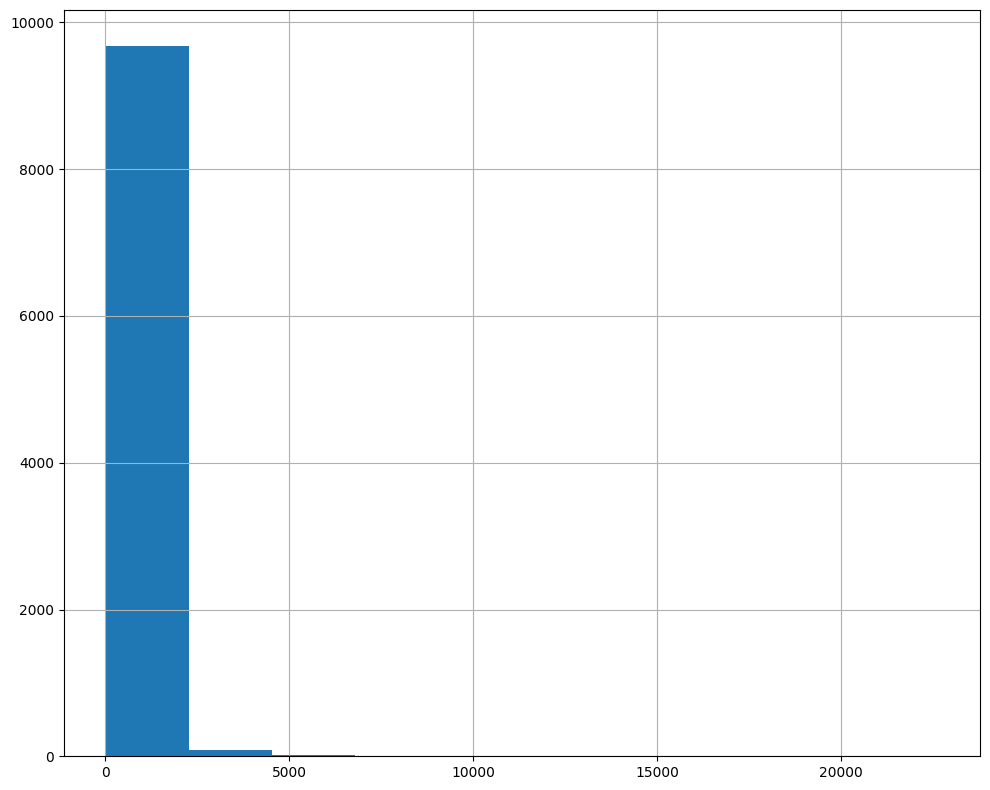

In [23]:
data['Sales'].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [24]:
from scipy.stats import f_oneway

Office_Supplies = data[data["Category"] == "Office Supplies"]["Sales"]
Furniture = data[data["Category"] == "Furniture"]["Sales"]
Technology = data[data["Category"] == "Technology"]["Sales"]

f_stat, p_value = f_oneway(Office_Supplies, Furniture, Technology)

print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 262.1646591215713
p-value: 1.2178144965918443e-111


In [25]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(
    endog=data["Sales"],
    groups=data["Category"],
    alpha=0.05
)

print(tukey)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1          group2      meandiff p-adj   lower     upper   reject
--------------------------------------------------------------------------
      Furniture Office Supplies -231.2728   0.0 -267.7759 -194.7697   True
      Furniture      Technology  105.7477   0.0    59.751  151.7444   True
Office Supplies      Technology  337.0205   0.0  298.5943  375.4466   True
--------------------------------------------------------------------------
